In [10]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import gym
import agents
import environment
import utils 

In [33]:
from importlib import reload
reload(agents)
reload(environment)
reload(utils)

<module 'utils' from '/home/nicola/Nicola_unipd/MasterThesis/Policy-based-RL/utils.py'>

In [34]:
def play_episode(agent, env, return_states=False, greedy=True):
    # Reset environment (start of an episode)
    state = env.reset()
    rewards = []
    log_probs = []
    done = []
    
    if return_states:
        states = [state]
    while True:
        state = np.array([state])
        action, log_prob = agent.get_action(state, return_log = True, greedy=greedy)
        new_state, reward, terminal, info = env.step(action) # gym standard step's output
        if return_states:
            states.append(new_state)
       
        rewards.append(reward)
        log_probs.append(log_prob)
        done.append(terminal)
        
        if terminal:
            break
            
        state = new_state
       
    rewards = np.array(rewards)
    log_probs = np.array(log_probs)
    done = np.array(done)
    
    if return_states:
        return rewards, log_probs, np.array(states), done
    else:
        return rewards, log_probs, done

In [35]:
def train_sandbox(n_episodes = 100, lr = 0.01, gamma = 0.99, greedy=False):
    # Create environment
    env = environment.Sandbox(10, 10, [0,0], [9,9], max_steps=50)
    observation_space = 10*10
    action_space = 4
    # Init agent
    agent = agents.DiscretePolicyGrad(observation_space, action_space, lr, gamma, project_dim=16)
    performance = []
    losses = []
    for e in range(n_episodes):
        #print("\nEpisode %d"%(e+1))
        rewards, log_probs, _ = play_episode(agent, env, greedy=greedy)
        #print('play_episode executed')
        performance.append(np.sum(rewards))
        if (e+1)%10 == 0:
            print("Episode %d - reward: %.2f"%(e+1, np.mean(performance[-10:])))
        
        #print("rewards: ", rewards)
        #print("log_probs: ", log_probs)
        loss = agent.update(rewards, log_probs)
        #print('update loss executed')
        losses.append(loss)
    return agent, np.array(performance), np.array(losses)

In [36]:
%%time
trained_agentPG, cumulative_rewardPG, lossesPG = train_sandbox(n_episodes = 500, lr=0.01, gamma=0.98)

Episode 10 - reward: -7.20
Episode 20 - reward: -4.30
Episode 30 - reward: -2.60
Episode 40 - reward: -2.80
Episode 50 - reward: -0.80
Episode 60 - reward: -5.20
Episode 70 - reward: -1.10
Episode 80 - reward: -0.80
Episode 90 - reward: 1.00
Episode 100 - reward: 1.00
Episode 110 - reward: 0.80
Episode 120 - reward: 1.00
Episode 130 - reward: 1.00
Episode 140 - reward: 0.90
Episode 150 - reward: 1.00
Episode 160 - reward: 1.00
Episode 170 - reward: 1.00
Episode 180 - reward: 1.00
Episode 190 - reward: 1.00
Episode 200 - reward: 1.00
Episode 210 - reward: 1.00
Episode 220 - reward: 1.00
Episode 230 - reward: 1.00
Episode 240 - reward: 1.00
Episode 250 - reward: 1.00
Episode 260 - reward: 1.00
Episode 270 - reward: 1.00
Episode 280 - reward: 1.00
Episode 290 - reward: 1.00
Episode 300 - reward: 1.00
Episode 310 - reward: 1.00
Episode 320 - reward: 1.00
Episode 330 - reward: 1.00
Episode 340 - reward: 1.00
Episode 350 - reward: 1.00
Episode 360 - reward: 1.00
Episode 370 - reward: 1.00
Ep

In [ ]:
%matplotlib notebook
utils.render(trained_agentPG)
%matplotlib inline

# A2C

In [44]:
from importlib import reload
reload(agents)
reload(environment)
reload(utils)

<module 'utils' from '/home/nicola/Nicola_unipd/MasterThesis/Policy-based-RL/utils.py'>

In [45]:
def play_episode_A2C(agent, env, return_states=False, greedy=True, update_online=True):
    # Reset environment (start of an episode)
    state = env.reset()
    rewards = []
    log_probs = []
    
    if return_states:
        states = [state]
        
    while True:
        state = np.array([state])
        action, log_prob = agent.get_action(state, return_log = True, greedy=greedy)
        new_state, reward, terminal, info = env.step(action) 
        if return_states:
            states.append(new_state)
            
        rewards.append(reward)
        if update_online:
            agent.update(reward, log_prob, state, new_state, terminal)

        if terminal:
            break
        state = new_state
        
    if return_states:
        return rewards, log_probs, np.array(states)
    else:
        return rewards, log_probs

In [46]:
def train_sandbox_A2C_v0(n_episodes = 100, lr_actor = 0.01, lr_critic = 0.01, gamma = 0.99, greedy=False):
    # Create environment
    env = environment.Sandbox(10, 10, [0,0], [9,9], max_steps=50)
    observation_space = 10*10
    action_space = 4
    # Init agent
    #agent = agents.DiscretePolicyGrad(observation_space, action_space, lr, gamma, project_dim=16)
    agent = agents.A2C_v0(observation_space, action_space, lr_actor, lr_critic, gamma, discrete=True, project_dim=16)
    performance = []
    
    for e in range(n_episodes):
        rewards, _ = play_episode_A2C(agent, env, return_states=False, greedy=greedy)
        
        performance.append(np.sum(rewards))
        if (e+1)%10 == 0:
            print("Episode %d - reward: %.2f"%(e+1, np.mean(performance[-10:])))

    return agent, np.array(performance)

In [48]:
%%time
trained_agentA2C, cumulative_rewardA2C = train_sandbox_A2C_v0(n_episodes = 500, lr_actor=1e-3, lr_critic=1e-3, gamma=0.99)

Episode 10 - reward: -6.60
Episode 20 - reward: -6.00
Episode 30 - reward: -5.70
Episode 40 - reward: -3.40
Episode 50 - reward: -5.90
Episode 60 - reward: -6.00
Episode 70 - reward: -6.60
Episode 80 - reward: -7.50
Episode 90 - reward: -6.70
Episode 100 - reward: -4.80
Episode 110 - reward: -5.00
Episode 120 - reward: -4.30
Episode 130 - reward: -7.30
Episode 140 - reward: -5.80
Episode 150 - reward: -4.20
Episode 160 - reward: -6.90
Episode 170 - reward: -5.50
Episode 180 - reward: -4.10
Episode 190 - reward: -5.40
Episode 200 - reward: -6.60
Episode 210 - reward: -4.20
Episode 220 - reward: -6.00
Episode 230 - reward: -4.50
Episode 240 - reward: -7.10
Episode 250 - reward: -4.70
Episode 260 - reward: -5.80
Episode 270 - reward: -4.90
Episode 280 - reward: -6.70
Episode 290 - reward: -6.70
Episode 300 - reward: -7.20
Episode 310 - reward: -5.10
Episode 320 - reward: -6.90
Episode 330 - reward: -5.20
Episode 340 - reward: -5.50
Episode 350 - reward: -5.60
Episode 360 - reward: -5.50
E

<IPython.core.display.Javascript object>


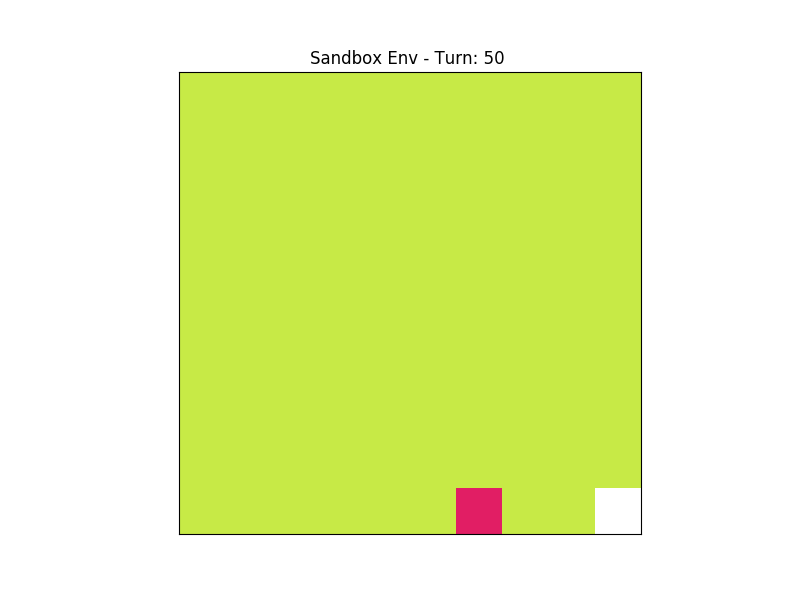

In [49]:
%matplotlib notebook
utils.render(trained_agentA2C)
%matplotlib inline